In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import pandas_datareader.data as web

In [5]:
## reading csv file for movie correlation

In [9]:
df=pd.read_csv('movies.csv')

In [10]:
##view the data

In [85]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [86]:
df.tail(10) ## last10 rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,NaN,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [71]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
## check missing data using heatmap

In [17]:
df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


<AxesSubplot:>

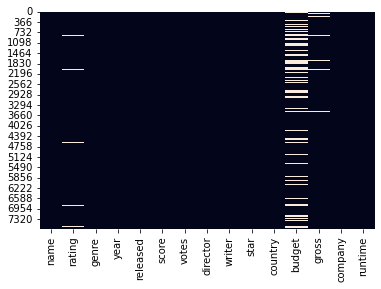

In [21]:
sns.heatmap(df.isnull(), cbar=False)

In [19]:
## from the plot above we can see that there's alot of budget data missing and some rating data as well.

In [87]:
missing = df.isnull().sum() ## total missing values per column
print(missing)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [90]:
##percentage of data missing
missing=df.isnull().sum()*100/ len(df)
print(missing)

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


In [93]:
df['rating']=df['rating'].fillna('Not rated') 
    ## fill all missing rating with not rated

In [96]:
##drop missing value

In [113]:
df.dropna(axis=0,inplace=True)## drop all missing values in the columns

In [100]:
## check for duplicates

In [105]:
df=df.drop_duplicates()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [106]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5432.000000,5432.000000,5.432000e+03,5.432000e+03,5.432000e+03,5432.000000
mean,2001.652062,6.393207,1.149876e+05,3.595576e+07,1.030726e+08,108.164212
std,10.537990,0.963273,1.842711e+05,4.155593e+07,1.871566e+08,18.120576
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.068520e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.674427e+07,105.000000
75%,2010.250000,7.100000,1.290000e+05,4.500000e+07,1.120906e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [109]:
##movies witha runtime greater than 180
df[df['runtime']>=180]['name']


21                                      Heaven's Gate
115                                              Reds
220                                            Gandhi
231                               Fanny and Alexander
345                                   The Right Stuff
479                       Once Upon a Time in America
1649                               Dances with Wolves
1857                                              JFK
1998                At Play in the Fields of the Lord
2082                                        Malcolm X
2247                                 Schindler's List
2272                              Blood In, Blood Out
2280                                       Gettysburg
2470                                       Wyatt Earp
2749                                            Nixon
2888                                           Hamlet
3045                                          Titanic
3449                                   The Green Mile
3461                        

In [120]:
## years with the highest average voting, in ascending order
df.groupby('year')['votes'].mean().sort_values(ascending=False)

year
2013    194310.559006
2014    186797.546012
2012    179525.308642
2011    172906.250000
2010    162330.487805
2008    159716.374269
2004    149526.721519
2007    148943.949045
2017    145469.172932
2009    145441.520468
2016    144359.748428
2006    143533.742331
2015    143071.794872
2020    137962.500000
2003    130798.113208
2019    127360.132743
2005    126581.176471
2001    123922.891566
1999    120965.030675
2002    112873.410405
2018    112353.846154
1994    104921.875000
2000    101062.576687
1995     97495.355072
1998     96060.810811
1997     95709.333333
1980     94896.625000
1990     67803.603604
1993     63428.671329
1996     62775.694444
1984     61960.606742
1991     58575.438596
1982     56334.098592
1992     55249.618321
1985     52972.389474
1989     52343.069565
1987     51632.701923
1986     49763.525253
1988     46580.330769
1983     44748.614458
1981     42848.126984
Name: votes, dtype: float64

Text(0.5, 1.0, 'votes by Year')

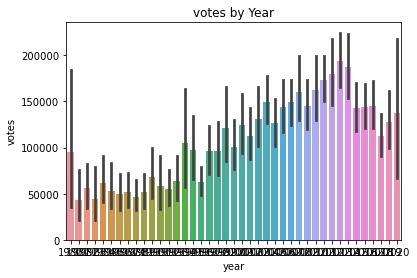

In [125]:
##visualizing year against votes
sns.barplot(x='year',y='votes',data=df)
plt.title('votes by Year')

In [ ]:
## year highest revenue

In [128]:
df.groupby('year')['gross'].max().sort_values(ascending=False)

year
2009    2.847246e+09
2019    2.797501e+09
1997    2.201647e+09
2015    2.069522e+09
2018    2.048360e+09
2012    1.518816e+09
2011    1.342322e+09
2017    1.332699e+09
2013    1.281508e+09
2016    1.153337e+09
2003    1.146031e+09
2014    1.104054e+09
1994    1.083721e+09
2010    1.066971e+09
2006    1.066180e+09
1993    1.033928e+09
1999    1.027083e+09
2001    1.006968e+09
2008    1.005974e+09
2007    9.609965e+08
2002    9.474951e+08
2004    9.287608e+08
2005    8.966782e+08
1996    8.174009e+08
1982    7.929106e+08
1998    5.537098e+08
2000    5.463881e+08
1980    5.383751e+08
1991    5.208812e+08
1990    5.057036e+08
1992    5.040502e+08
1983    4.751062e+08
1989    4.741718e+08
2020    4.614216e+08
1995    3.944366e+08
1981    3.899260e+08
1985    3.819068e+08
1986    3.572882e+08
1988    3.548254e+08
1984    3.331073e+08
1987    3.201457e+08
Name: gross, dtype: float64

In [134]:
## rating of each director movies
df.groupby('director')['rating'].sum().sort_values(ascending=False)

director
David O. Russell         UnratedRRRRRRPG-13
John McNaughton                   UnratedRR
Stuart Gordon                   UnratedRPGR
Todd Haynes                 UnratedRPG-13RR
Kelly Reichardt                  UnratedRPG
                                ...        
Steve 'Spaz' Williams                     G
Gary Chapman                              G
Gary Halvorson                            G
Aaron Blaise                              G
John Derek                        ApprovedR
Name: rating, Length: 2066, dtype: object

In [140]:
## the top 10 lengthest movies,
top10_len=df.nlargest(10,'runtime',)[['name','runtime']].set_index('name')
top10_len

,runtime
name,
Gettysburg,271.0
Hamlet,242.0
Once Upon a Time in America,229.0
Heaven's Gate,219.0
Gods and Generals,219.0
Kabhi Khushi Kabhie Gham...,210.0
The Irishman,209.0
Malcolm X,202.0
The Lord of the Rings: The Return of the King,201.0


In [150]:
## number of movies per year
df['year'].value_counts()

2002    173
2009    171
2008    171
2005    170
2001    166
2010    164
2000    163
2014    163
2006    163
1999    163
2012    162
2013    161
2011    160
2003    159
2016    159
2004    158
2007    157
2015    156
1997    150
1998    148
1996    144
2018    143
1993    143
1995    138
2017    133
1992    131
1988    130
1994    128
1989    115
1991    114
2019    113
1990    111
1987    104
1986     99
1985     95
1984     89
1983     83
1982     71
1981     63
1980     40
2020      8
Name: year, dtype: int64

Text(0.5, 1.0, 'no. of movies per year')

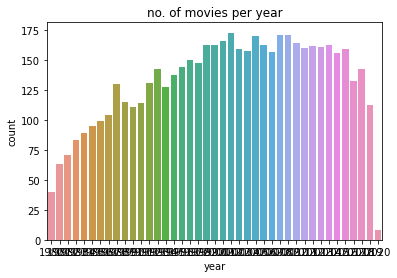

In [152]:
## visualizing the movies per year
sns.countplot(x='year',data=df)
plt.title('no. of movies per year')

In [175]:
df['budget']=df.budget.astype('int')
df['budget']

0        19000000
1         4500000
2        18000000
3         3500000
4         6000000
          ...    
7648     90000000
7649     85000000
7650    175000000
7651    135000000
7652     80000000
Name: budget, Length: 5432, dtype: int32

In [180]:
## Highest grossing movies
df.groupby('name')['gross'].sum().sort_values(ascending=False)

name
The Lion King                                 2.754448e+09
Star Wars: Episode VII - The Force Awakens    2.069522e+09
Avengers: Infinity War                        2.048360e+09
Beauty and the Beast                          1.689402e+09
Jurassic World                                1.670516e+09
                                                  ...     
Madadayo                                      5.960000e+02
Trojan War                                    3.090000e+02
Titanic                                      -2.147484e+09
Avengers: Endgame                            -2.147484e+09
Avatar                                       -2.147484e+09
Name: gross, Length: 5347, dtype: float64

Text(0.5, 1.0, 'no. of movies per year')

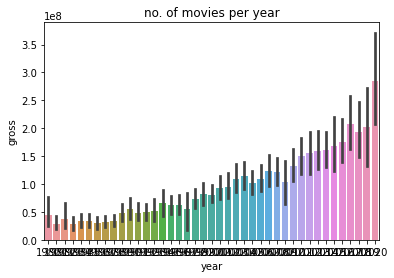

In [181]:
## visualizing gross revenue per year
sns.barplot(x='year',y='gross',data=df)
plt.title('no. of movies per year')

In [182]:
## correlation

Text(0.5, 1.0, 'Correlation Matrix')

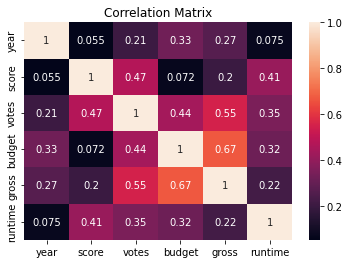

In [188]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
## there is a high correlation between budget and gross

<AxesSubplot:xlabel='budget', ylabel='gross'>

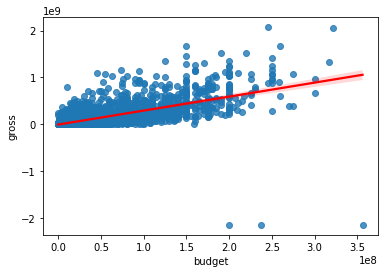

In [186]:
## view the distribution of the data points
sns.regplot(x='budget',y='gross',data=df,line_kws={'color':'red'})

In [192]:
## convert categorical data into a numeric value 

In [215]:
df_numerized= df
  
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
        
df_numerized.head()       

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4702,7,6,1980,1308,8.4,927000.0,1797,2838,699,46,19000000,46998772,1431,146.0
1,3939,7,1,1980,1131,5.8,65000.0,1580,1159,214,47,4500000,58853106,454,104.0
2,3651,5,0,1980,1363,8.7,1200000.0,759,1821,1160,47,18000000,538375067,948,124.0
3,205,5,4,1980,1131,7.7,221000.0,891,1415,1477,47,3500000,83453539,1113,88.0
4,734,7,4,1980,1174,7.3,108000.0,721,351,271,47,6000000,39846344,1088,98.0


<AxesSubplot:>

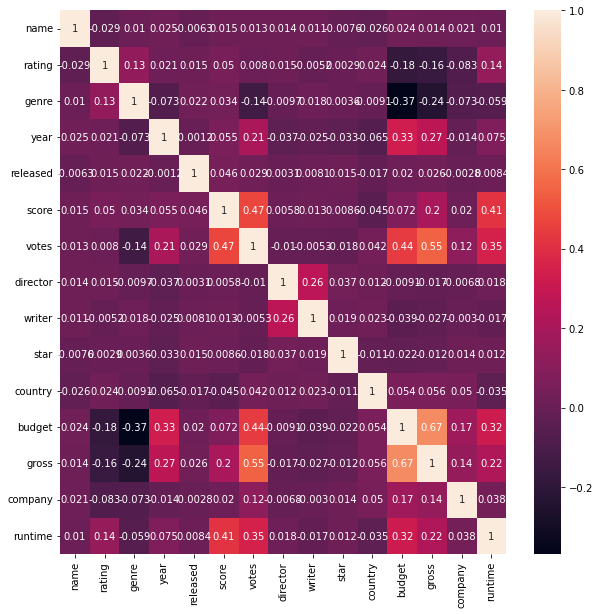

In [199]:
plt.figure(figsize=(10,10))
sns.heatmap(df_numerized.corr(),annot=True)
## high correlation between votes and gross revenue

In [212]:
##pair the correlation
correlation_matrix= df_numerized.corr()

corr_pairs=correlation_matrix.unstack()

print(corr_pairs)

name     name        1.000000
         rating     -0.029146
         genre       0.010247
         year        0.024901
         released   -0.006258
                       ...   
runtime  country    -0.034941
         budget      0.318423
         gross       0.223432
         company     0.038444
         runtime     1.000000
Length: 225, dtype: float64


In [204]:
## sort out the correaction in ascending order
sorted_pairs=correlation_pairs.sort_values()
sorted_pairs

budget   genre     -0.368763
genre    budget    -0.368763
gross    genre     -0.238862
genre    gross     -0.238862
rating   budget    -0.180511
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [214]:
## correlation greater than 5
high_corr=sorted_pairs[(sorted_pairs)>0.5]

high_corr

gross     votes       0.550756
votes     gross       0.550756
gross     budget      0.669371
budget    gross       0.669371
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64